In [54]:
import pandas as pd
from pandas.core.reshape.concat import concat
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn.metrics import accuracy_score

In [55]:
iris = load_iris()

In [56]:
features_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
label_df = pd.DataFrame(iris.target,columns=["species"])

In [57]:
iris_df = concat([features_df,label_df],axis=1)

In [58]:
print(iris_df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
0                  5.1               3.5  ...               0.2        0
1                  4.9               3.0  ...               0.2        0
2                  4.7               3.2  ...               0.2        0
3                  4.6               3.1  ...               0.2        0
4                  5.0               3.6  ...               0.2        0
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[150 rows x 5 columns]


In [59]:
print(iris_df.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [60]:
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None


In [61]:
print(iris_df.describe().T)

                   count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
species            150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


In [62]:
print("Features = ",iris_df.columns[0],iris_df.columns[1],iris_df.columns[2],iris_df.columns[3])

Features =  sepal length (cm) sepal width (cm) petal length (cm) petal width (cm)


In [63]:
print("Label = ",iris_df.columns[4])

Label =  species


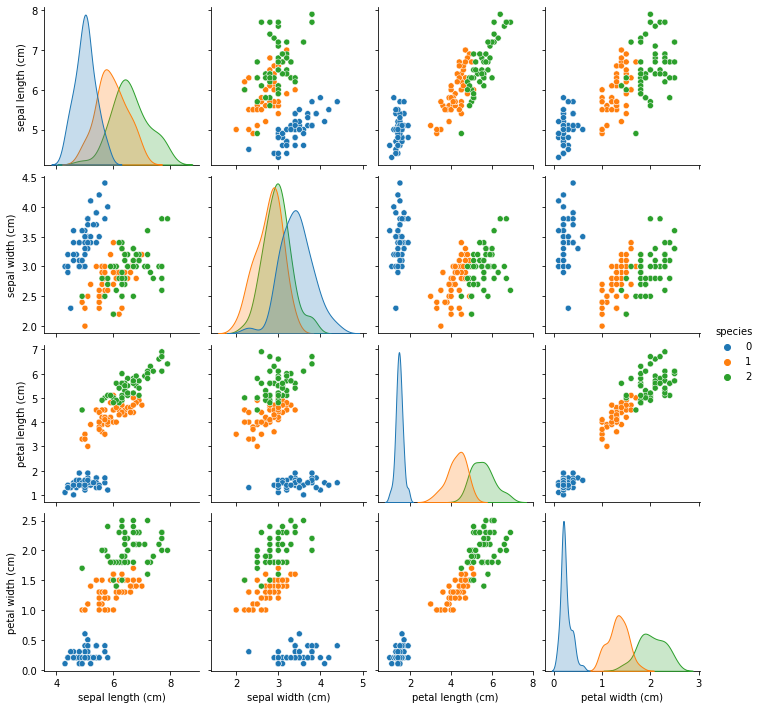

In [64]:
sns.pairplot(iris_df, hue='species',palette="tab10")

In [65]:
x = iris_df.drop("species", axis = 1)
y = iris_df["species"].astype("category")

In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3)

In [67]:
print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
99                 5.7               2.8                4.1               1.3
0                  5.1               3.5                1.4               0.2
15                 5.7               4.4                1.5               0.4
12                 4.8               3.0                1.4               0.1
138                6.0               3.0                4.8               1.8
..                 ...               ...                ...               ...
90                 5.5               2.6                4.4               1.2
60                 5.0               2.0                3.5               1.0
127                6.1               3.0                4.9               1.8
108                6.7               2.5                5.8               1.8
16                 5.4               3.9                1.3               0.4

[105 rows x 4 columns]


In [68]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
63                 6.1               2.9                4.7               1.4
7                  5.0               3.4                1.5               0.2
11                 4.8               3.4                1.6               0.2
139                6.9               3.1                5.4               2.1
4                  5.0               3.6                1.4               0.2
57                 4.9               2.4                3.3               1.0
27                 5.2               3.5                1.5               0.2
133                6.3               2.8                5.1               1.5
134                6.1               2.6                5.6               1.4
73                 6.1               2.8                4.7               1.2
109                7.2               3.6                6.1               2.5
58                 6.6               2.9                4.6     

In [69]:
print(Y_train)

99     1
0      0
15     0
12     0
138    2
      ..
90     1
60     1
127    2
108    2
16     0
Name: species, Length: 105, dtype: category
Categories (3, int64): [0, 1, 2]


In [70]:
print(Y_test)

63     1
7      0
11     0
139    2
4      0
57     1
27     0
133    2
134    2
73     1
109    2
58     1
26     0
47     0
84     1
49     0
137    2
85     1
126    2
31     0
9      0
25     0
123    2
113    2
141    2
70     1
48     0
75     1
40     0
71     1
147    2
102    2
10     0
111    2
81     1
6      0
44     0
55     1
104    2
132    2
69     1
17     0
117    2
148    2
37     0
Name: species, dtype: category
Categories (3, int64): [0, 1, 2]


In [71]:
logistic_model = LogisticRegression(max_iter = 200).fit(X_train,Y_train)

prediction = logistic_model.predict(X_test)
print("Logistic Regression Accuracy = ",accuracy_score(prediction,Y_test))

Logistic Regression Accuracy =  0.9555555555555556


In [72]:
k_nearest_neighbors_model = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":np.arange(1,25)},cv=5).fit(X_train,Y_train.values.ravel())
print("K-Nearest Neighbors Bets Parmeter = ",k_nearest_neighbors_model.best_params_)
print("K-Nearest Neighbors Accuracy = ",k_nearest_neighbors_model.best_score_)

K-Nearest Neighbors Bets Parmeter =  {'n_neighbors': 9}
K-Nearest Neighbors Accuracy =  0.9714285714285715


In [73]:
support_vector_machine_model = svm.SVC().fit(X_train,Y_train)
prediction = support_vector_machine_model.predict(X_test)
print("Support Vector Machine Accuracy = ",accuracy_score(prediction,Y_test))

Support Vector Machine Accuracy =  0.9555555555555556


In [74]:
decision_tree_model = DecisionTreeClassifier().fit(X_train,Y_train)
prediction = decision_tree_model.predict(X_test)
print("Decision Tree Accuracy = ",accuracy_score(prediction,Y_test))

Decision Tree Accuracy =  0.9555555555555556


In [75]:
prediction_knn_df = pd.DataFrame(k_nearest_neighbors_model.predict(x),columns=["prediction"])
prediction_iris_df = pd.DataFrame(concat([iris_df,prediction_knn_df],axis=1))

In [76]:
print(prediction_iris_df)

     sepal length (cm)  sepal width (cm)  ...  species  prediction
0                  5.1               3.5  ...        0           0
1                  4.9               3.0  ...        0           0
2                  4.7               3.2  ...        0           0
3                  4.6               3.1  ...        0           0
4                  5.0               3.6  ...        0           0
..                 ...               ...  ...      ...         ...
145                6.7               3.0  ...        2           2
146                6.3               2.5  ...        2           2
147                6.5               3.0  ...        2           2
148                6.2               3.4  ...        2           2
149                5.9               3.0  ...        2           2

[150 rows x 6 columns]


In [77]:
sepal_x = iris_df[["sepal length (cm)","sepal width (cm)"]]
sepal_y = iris_df[["species"]]

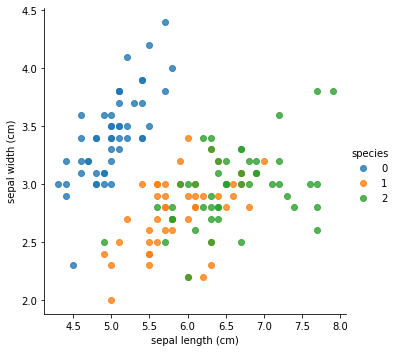

In [78]:
sns.lmplot(x="sepal length (cm)",y="sepal width (cm)",fit_reg = False,hue="species",data = iris_df)

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(sepal_x,sepal_y,test_size=0.3)

In [80]:
print(X_train)

     sepal length (cm)  sepal width (cm)
46                 5.1               3.8
75                 6.6               3.0
132                6.4               2.8
74                 6.4               2.9
78                 6.0               2.9
..                 ...               ...
53                 5.5               2.3
110                6.5               3.2
21                 5.1               3.7
126                6.2               2.8
67                 5.8               2.7

[105 rows x 2 columns]


In [81]:
print(X_test)

     sepal length (cm)  sepal width (cm)
105                7.6               3.0
82                 5.8               2.7
68                 6.2               2.2
31                 5.4               3.4
120                6.9               3.2
98                 5.1               2.5
71                 6.1               2.8
14                 5.8               4.0
77                 6.7               3.0
147                6.5               3.0
90                 5.5               2.6
141                6.9               3.1
89                 5.5               2.5
119                6.0               2.2
49                 5.0               3.3
76                 6.8               2.8
104                6.5               3.0
142                5.8               2.7
65                 6.7               3.1
84                 5.4               3.0
56                 6.3               3.3
144                6.7               3.3
43                 5.0               3.5
44              

In [82]:
print(Y_train)

     species
46         0
75         1
132        2
74         1
78         1
..       ...
53         1
110        2
21         0
126        2
67         1

[105 rows x 1 columns]


In [83]:
print(Y_test)

     species
105        2
82         1
68         1
31         0
120        2
98         1
71         1
14         0
77         1
147        2
90         1
141        2
89         1
119        2
49         0
76         1
104        2
142        2
65         1
84         1
56         1
144        2
43         0
44         0
86         1
30         0
66         1
42         0
127        2
146        2
8          0
4          0
118        2
81         1
15         0
94         1
26         0
35         0
6          0
45         0
79         1
129        2
140        2
39         0
24         0


In [84]:
logistic_model = LogisticRegression().fit(X_train,Y_train.values.ravel())

prediction = logistic_model.predict(X_test)
print("Logistic Regression Accuracy = ",accuracy_score(prediction,Y_test))

Logistic Regression Accuracy =  0.8222222222222222


In [85]:
k_nearest_neighbors_model = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":np.arange(1,25)},cv=5).fit(X_train,Y_train.values.ravel())
print("K-Nearest Neighbors Bets Parmeter = ",k_nearest_neighbors_model.best_params_)
print("K-Nearest Neighbors Accuracy = ",k_nearest_neighbors_model.best_score_)

K-Nearest Neighbors Bets Parmeter =  {'n_neighbors': 22}
K-Nearest Neighbors Accuracy =  0.819047619047619


In [86]:
support_vector_machine_model = svm.SVC().fit(X_train,Y_train.values.ravel())
prediction = support_vector_machine_model.predict(X_test)
print("Support Vector Machine Accuracy = ",accuracy_score(prediction,Y_test))

Support Vector Machine Accuracy =  0.8


In [87]:
decision_tree = DecisionTreeClassifier().fit(X_train,Y_train)
prediction = decision_tree.predict(X_test)
print("Decision Tree Accuracy = ",accuracy_score(prediction,Y_test))

Decision Tree Accuracy =  0.6444444444444445


In [88]:
petal_x = iris_df[["petal length (cm)","petal width (cm)"]]
petal_y = iris_df[["species"]]

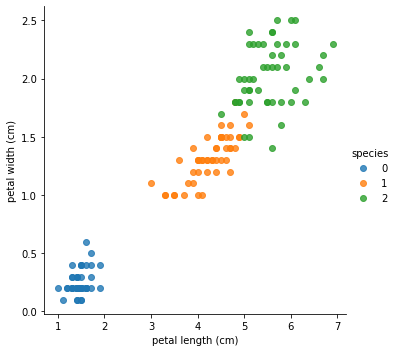

In [89]:
sns.lmplot(x="petal length (cm)",y="petal width (cm)",fit_reg = False,hue="species",data = iris_df)

In [90]:
X_train,X_test,Y_train,Y_test = train_test_split(petal_x,petal_y,test_size=0.3)

In [91]:
print(X_train)

     petal length (cm)  petal width (cm)
94                 4.2               1.3
58                 4.6               1.3
134                5.6               1.4
61                 4.2               1.5
145                5.2               2.3
..                 ...               ...
0                  1.4               0.2
77                 5.0               1.7
2                  1.3               0.2
63                 4.7               1.4
37                 1.4               0.1

[105 rows x 2 columns]


In [92]:
print(X_test)

     petal length (cm)  petal width (cm)
50                 4.7               1.4
83                 5.1               1.6
100                6.0               2.5
69                 3.9               1.1
148                5.4               2.3
11                 1.6               0.2
68                 4.5               1.5
91                 4.6               1.4
74                 4.3               1.3
127                4.9               1.8
105                6.6               2.1
99                 4.1               1.3
31                 1.5               0.4
135                6.1               2.3
3                  1.5               0.2
142                5.1               1.9
84                 4.5               1.5
120                5.7               2.3
110                5.1               2.0
36                 1.3               0.2
32                 1.5               0.1
140                5.6               2.4
104                5.8               2.2
59              

In [93]:
print(Y_train)

     species
94         1
58         1
134        2
61         1
145        2
..       ...
0          0
77         1
2          0
63         1
37         0

[105 rows x 1 columns]


In [94]:
print(Y_test)

     species
50         1
83         1
100        2
69         1
148        2
11         0
68         1
91         1
74         1
127        2
105        2
99         1
31         0
135        2
3          0
142        2
84         1
120        2
110        2
36         0
32         0
140        2
104        2
59         1
42         0
18         0
122        2
26         0
23         0
103        2
62         1
80         1
46         0
112        2
129        2
55         1
19         0
64         1
138        2
115        2
113        2
33         0
118        2
72         1
87         1


In [95]:
logistic_model = LogisticRegression().fit(X_train,Y_train.values.ravel())

prediction = logistic_model.predict(X_test)
print("Logistic Regression Accuracy = ",accuracy_score(prediction,Y_test))

Logistic Regression Accuracy =  0.9777777777777777


In [96]:
k_nearest_neighbors_model = GridSearchCV(KNeighborsClassifier(),{"n_neighbors":np.arange(1,25)},cv=5).fit(X_train,Y_train.values.ravel())
print("K-Nearest Neighbors Bets Parmeter = ",k_nearest_neighbors_model.best_params_)
print("K-Nearest Neighbors Accuracy = ",k_nearest_neighbors_model.best_score_)

K-Nearest Neighbors Bets Parmeter =  {'n_neighbors': 9}
K-Nearest Neighbors Accuracy =  0.961904761904762


In [97]:
support_vector_machine_model = svm.SVC().fit(X_train,Y_train.values.ravel())
prediction = support_vector_machine_model.predict(X_test)
print("Support Vector Machine Accuracy = ",accuracy_score(prediction,Y_test))

Support Vector Machine Accuracy =  0.9555555555555556


In [98]:
decision_tree = DecisionTreeClassifier().fit(X_train,Y_train)
prediction = decision_tree.predict(X_test)
print("Decision Tree Accuracy = ",accuracy_score(prediction,Y_test))

Decision Tree Accuracy =  0.9555555555555556


In [104]:
prediction_petal_logistic_df = pd.DataFrame(logistic_model.predict(petal_x),columns=["prediction"])
prediction_iris_df = pd.DataFrame(concat([iris_df,prediction_petal_logistic_df],axis=1))

In [105]:
print(prediction_iris_df)

     sepal length (cm)  sepal width (cm)  ...  species  prediction
0                  5.1               3.5  ...        0           0
1                  4.9               3.0  ...        0           0
2                  4.7               3.2  ...        0           0
3                  4.6               3.1  ...        0           0
4                  5.0               3.6  ...        0           0
..                 ...               ...  ...      ...         ...
145                6.7               3.0  ...        2           2
146                6.3               2.5  ...        2           2
147                6.5               3.0  ...        2           2
148                6.2               3.4  ...        2           2
149                5.9               3.0  ...        2           2

[150 rows x 6 columns]
